<h1>Lab | Cleaning categorical data</h1><br>
    
For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder. In this lab we will explore categorical data. You can also continue working on the same jupyter notebook from the previous lab. However that is not necessary.

<h2>Instructions</h2><br>
    
- 1. Import the necessary libraries if you are starting a new notebook.
- 2. Load the csv. Use the variable customer_df as customer_df = pd.read_csv().
- 3. What should we do with the customer_id column?
- 4. Load the continuous and discrete variables into numericals_df and categorical_df variables, for eg.:
            numerical_df = customer_df.select_dtypes()
            categorical_df = customer_df.select_dtypes()
- 5. Plot every categorical variable. What can you see in the plots? Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis. However, this time you will try a different plot. This time in each plot for the categorical variable you will have, each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis
- 6. For the categorical data, check if there is any data cleaning that need to perform. Hint: You can use the function value_counts() on each of the categorical columns and check the representation of different categories in each column. Discuss if this information might in some way be used for data cleaning.

**1. Import libraries and dependencies**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

**2. Load the csv file**

In [3]:
customer_df = pd.read_csv("files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


**3. What should we do with the customer_id column?**

In [4]:
customer_df['Customer'].nunique() # Counting the unique different values this column has

9134

>We should delete it, because it has a different value per row and it only works as an identifier. Completely useless for being analyzed or for learning a model

In [6]:
customer_df.drop(["Customer"], axis=1, inplace = True)

**4. Load the continuous and discrete variables into numericals_df and categorical_df variables**

In [7]:
numerical_df = customer_df.select_dtypes(include='number')
categorical_df = customer_df.select_dtypes(exclude='number')

**5. Plot every categorical variable**

In [11]:
# First of all, I'll modify the column "Effective To Date" to work better

# Convert dates in datetime format

categorical_df['Effective To Date'] = pd.to_datetime(categorical_df['Effective To Date'], errors='coerce')

# Transform the column into a column that gives us only the month and the year

categorical_df['Effective To Date'] = categorical_df['Effective To Date'].apply(lambda x: x.strftime('%B-%Y'))

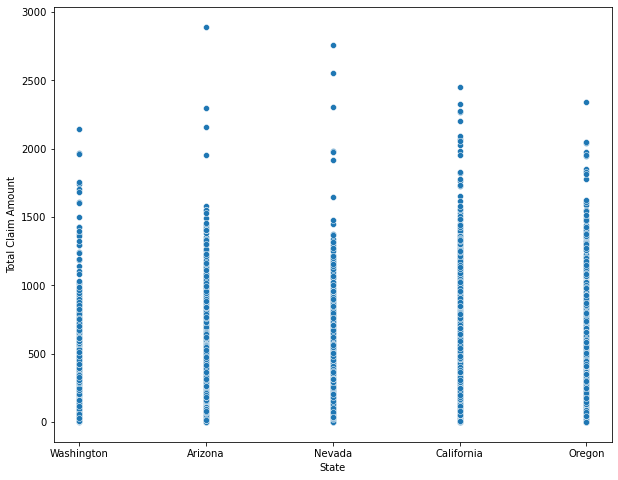

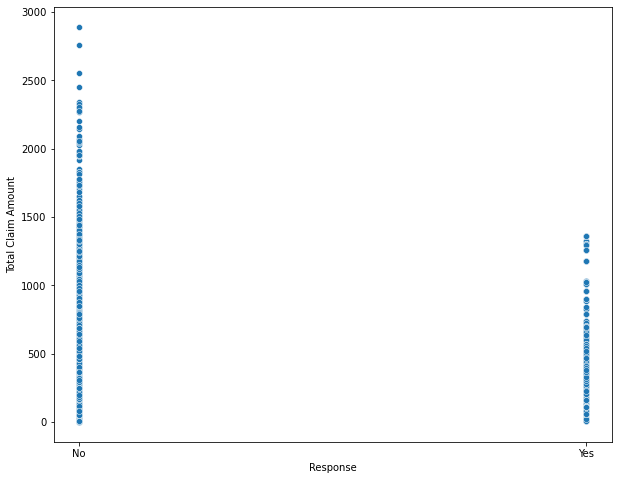

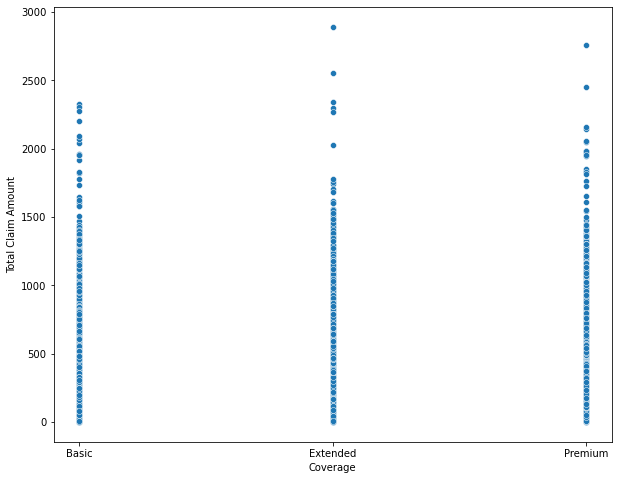

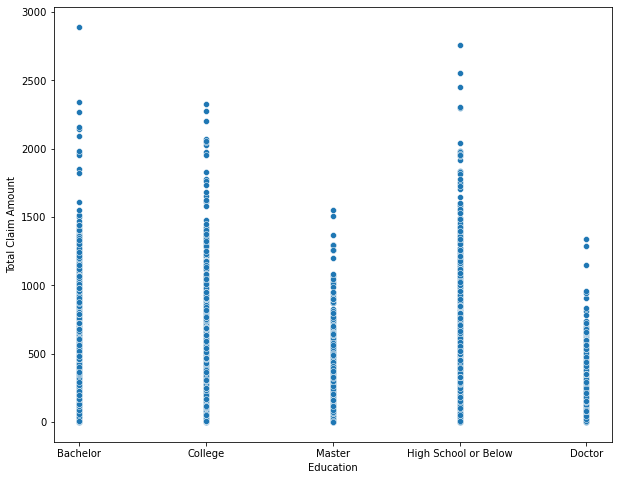

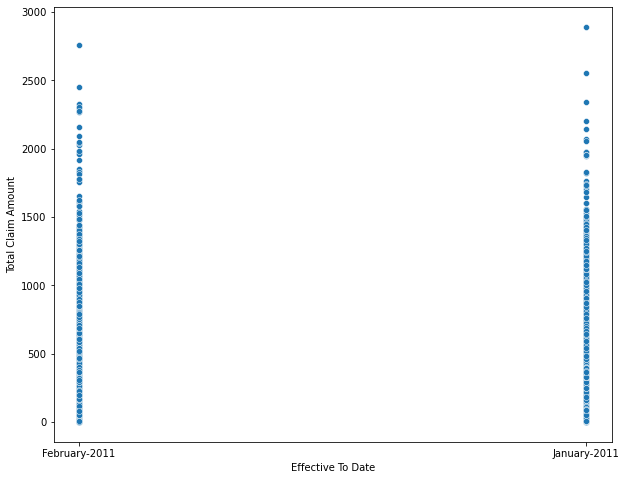

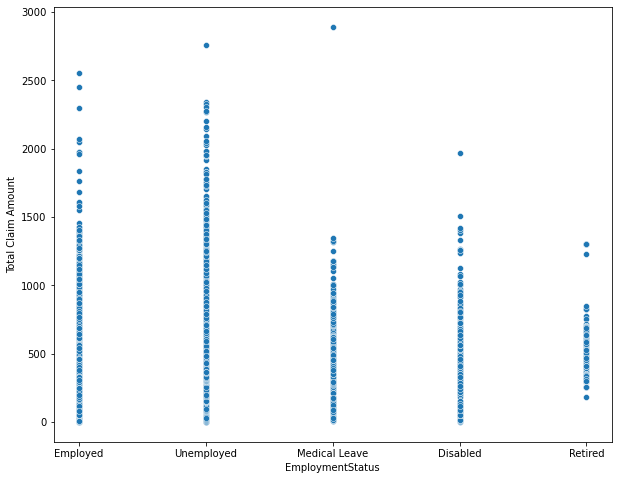

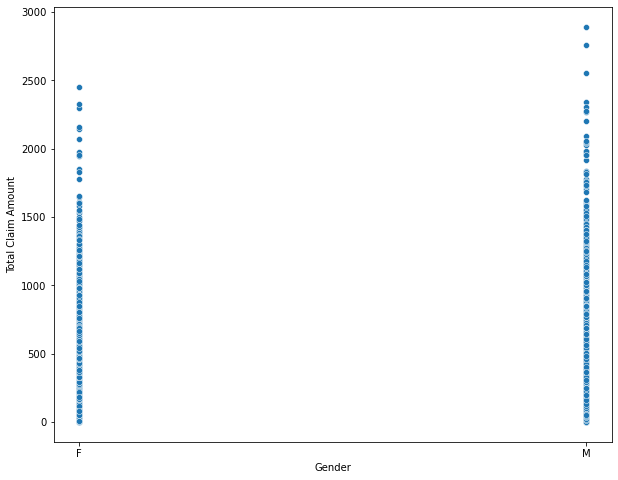

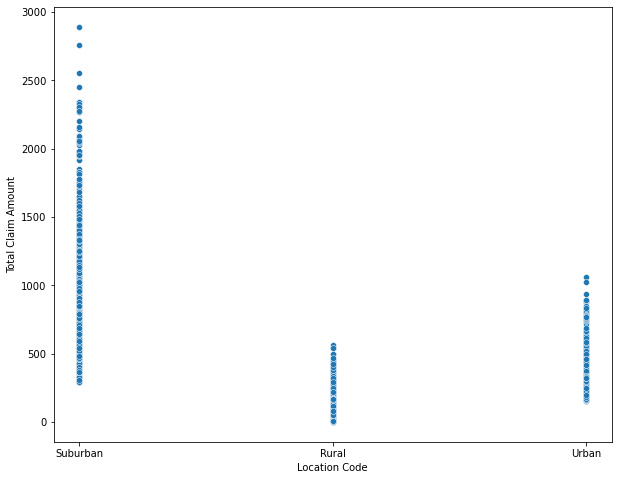

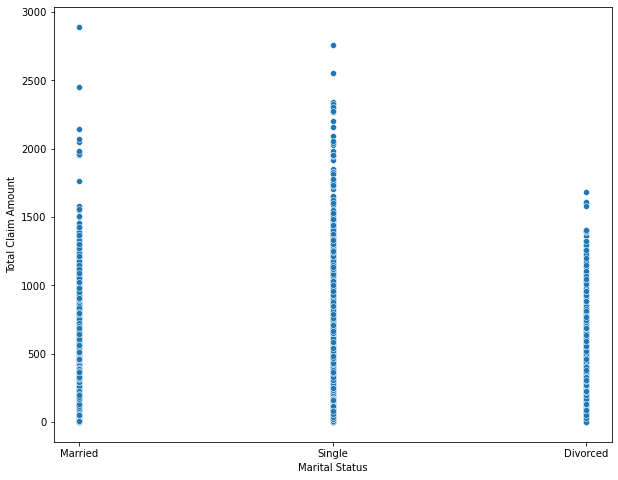

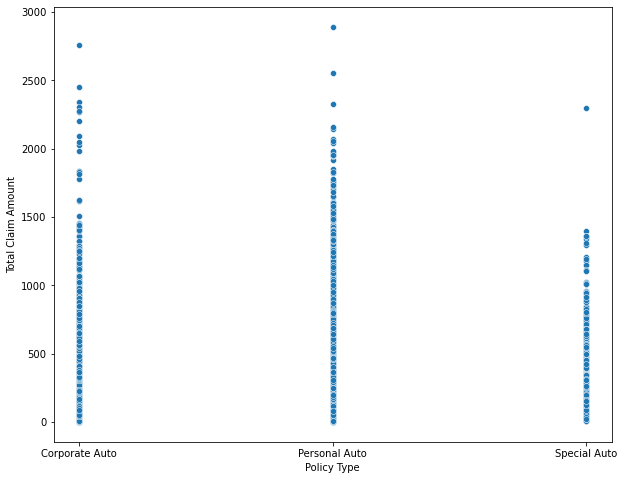

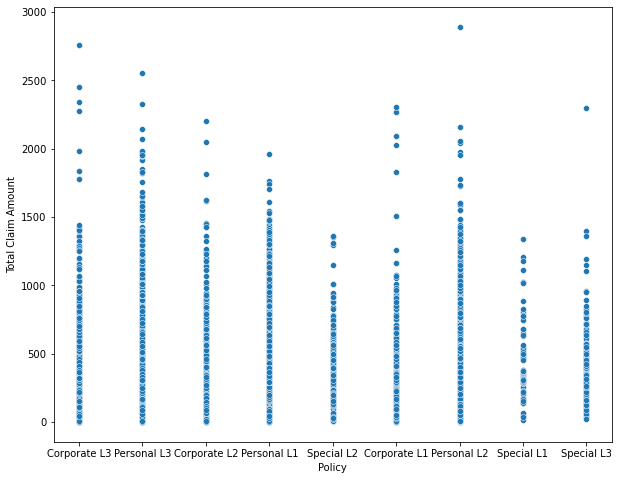

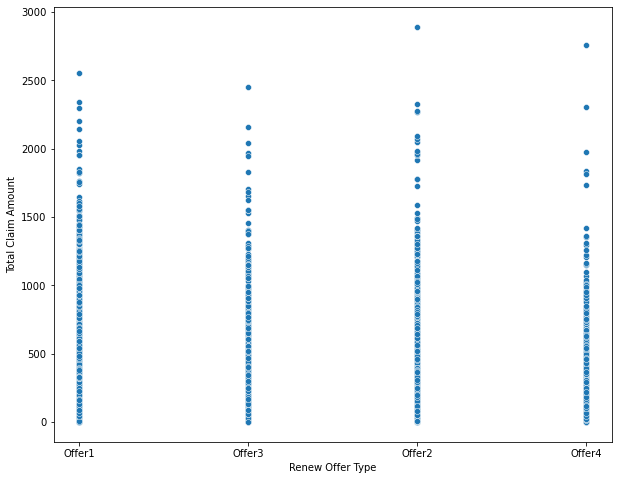

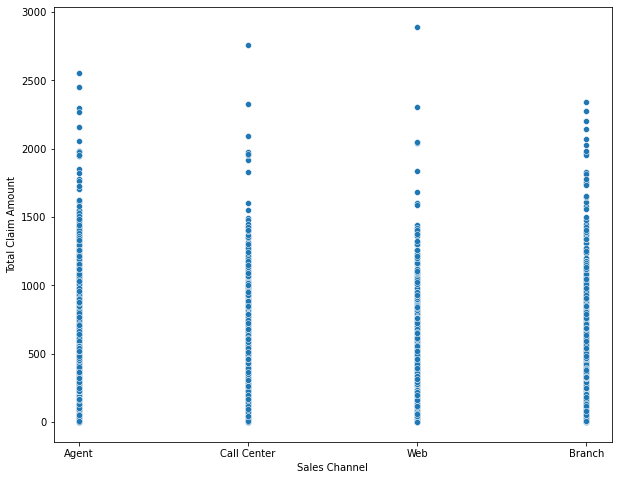

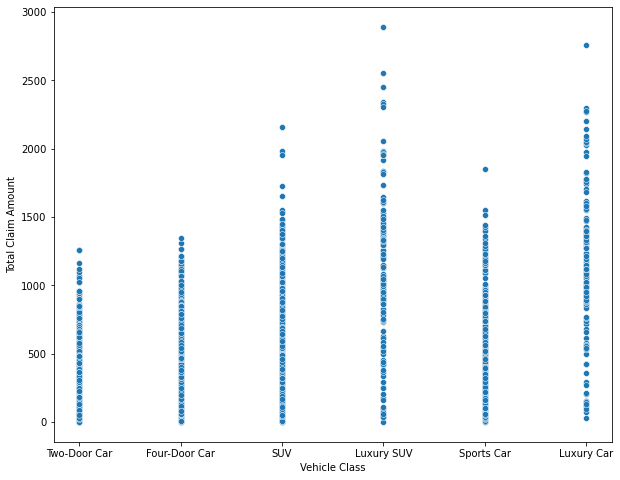

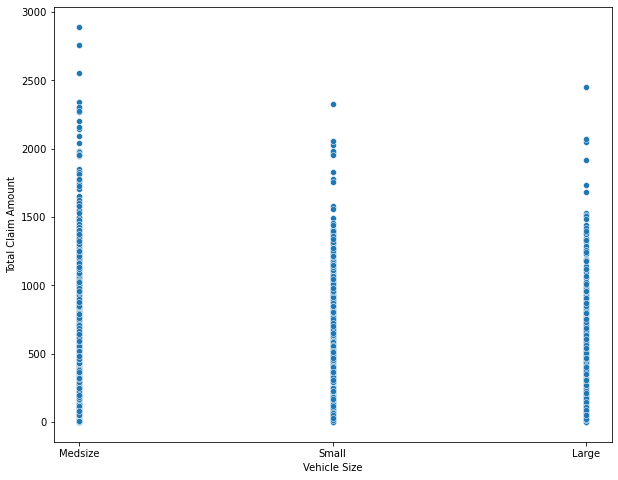

In [12]:
for features in categorical_df:
    plt.figure(figsize=(10,8))
    sns.scatterplot(data=customer_df, x=categorical_df[features], y=numerical_df['Total Claim Amount'])
    plt.show()

#### CONCLUSION:
- Broadly speaking, we can't see a huge difference between the categories of each feature except for people who lives in suburban areas or clients who have low or medium education level.
- Customers who have special policies tend to reclaim less but probably because we don't have as much amount of this kind of policies.
- It seems that luxury car drivers ara more likely to reclaim a bigger amount.

**6. For the categorical data, check if there is any data cleaning that need to perform**

>I don't thing we should clean more categorical data. Maybe the only feature I would group to reduce less options would be the policy types, grouping them for kind of policy or its level.